# STINTSY Major Course Output

*S12 - Ryan Jay Deculawan, Hyenne Audrey Lim, Viktoria Lila Sicuan*

## 1. Introduction

Soccer's extraordinary global appeal, with 3.5 billion supporters worldwide, cements its position as the most watched sport on the planet. Soccer creates a common passion that brings people from all walks of life together (The Most Popular Sports In The World, n.d.). This worldwide sport has the remarkable potential to cross cultural, language, and geographical borders, bringing people together from all walks of life. Fans congregate in their homes, bars, or stadiums to form a feeling of community and shared identity. Soccer's ongoing popularity stems from its capacity to bring together people of all ages and skill levels, making it more than simply a game but a celebration of athleticism, teamwork, and the universal spirit of competitiveness.

Soccer's enormous commercial worth is clear in the huge sums it earns for numerous leagues throughout the world. Soccer leagues have the highest TV viewership of any sports league, which contributes greatly to the sport's economic supremacy. The World Cup, the flagship event, is the embodiment of this phenomena, easily outshining every other significant athletic event. The tremendous viewership and worldwide influence of the World Cup highlight soccer's power to captivate the collective interest and intrigue of audiences on an unprecedented scale, transforming it into more than simply a game but a global cultural phenomenon. Soccer's economic impact, paired with its exciting dynamics, solidifies it as a sporting superpower that crosses geographical and cultural barriers (The World’s Most Watched Sports, 2017).

### Problem

Home advantage, which occurs in all sports, including soccer, is caused by a mix of psychological and physiological variables. The presence of ardent supporters fosters a supportive and motivational environment for the home side while perhaps influencing referee decisions owing to crowd reactions. Furthermore, the physical and emotional exhaustion involved with travel for visiting teams contributes to the home edge. The familiarity with the particular qualities of the home field, like as pitch size and surface, further tilts the scale in favor of the home side. Home advantage is essentially a complicated interaction of crowd support, referee dynamics, travel-related obstacles, and field familiarity that shapes the competitive landscape of sports (Zheng, 2015).

With this in mind, our objective is to investigate the feasibility of forecasting home advantage based on a snapshot of soccer matches. This project intends to emphasize the complex problems of applying modeling tools to real-life events, particularly in the dynamic environment of soccer matches. These machine learning models can help teams plan better strategies by offering insights into their opponents' strengths and weaknesses, such as knowing whether it is strategically better to play aggressively given the statistics of the match. Fans may also appreciate the game on a whole new level through the analysis of data and understanding the aspects that contribute to a team's success. Furthermore, predictive models can assist spectators in making better educated predictions about the outcome of a game, which can increase the enjoyment of watching the game.

## 2. Description of the Dataset

To address the identified task, the Sports dataset was selected. This dataset contains 7000 random snapshots from soccer matches. This dataset was used as part of a [Kaggle Community Prediction Competition](https://www.kaggle.com/competitions/sports-trading-will-there-be-more-goals/overview).

One row in the dataset represents one snapshot of a match while one column represents one feature of a match. As mentioned, there are **7000 instances** (rows), and **21 features** (columns). The features of the dataset are as follows:

1. `uuid` - The unique identifier of the snapshot
2. `current_minute` - The current minute of the in-play match. The 15 minute half-time break is included so a match has a total of 105 minutes. A current_minute of 70 corresponds to the actual match time of 55.
3. `home_score` - Goals scored by the home team as of this current_minute
4. `away_score`– Goals scored by the away team as of this current_minute
5. `home_yellow_cards` - Yellow cards given to the home team as of this current_minute
6. `away_yellow_cards` - Yellow cards given to the away team as of this current_minute
7. `home_red_cards` - Red cards given to the home team as of this current_minute
8. `away_red_cards` - Red cards given to the away team as of this current_minute
9. `home_attacks` - Attacks attempted by the home team as of this current_minute
10. `away_attacks` - Attacks attempted by the away team as of this current_minute
11. `home_dangerous_attacks` - Dangerous attacks attempted by the home team as of this current_minute
12. `away_dangerous_attacks` - Dangerous attacks attempted by the away team as of this current_minute
13. `home_corners` - Corners awarded to the home team as of this current_minute
14. `away_corners` - Corners awarded to the away team as of this current_minute
15. `home_off_target` - Shots that didn't have to be cleared by the goalkeeper that were attempted to the home team as of this current_minute
16. `away_off_target` - Shots that didn't have to be cleared by the goalkeeper that were attempted to the away team as of this current_minute
17. `home_on_target` - Shots that had to be cleared by the goalkeeper that were attempted to the home team as of this current_minute`
18. `away_on_target` - Shots that had to be cleared by the goalkeeper that were attempted to the away team as of this current_minute`
19. `home_possession` - How much ball possession in % did the home team have until this current_minute`
20. `away_possession` - How much ball possession in % did the away team have until this current_minute`
21. `final_delta` - The intended target value for each instance. Given that this dataset is from a competition, this column was provided as the value to be predicted for an instance's set of features.

## 3. List of Requirements

The following are the libraries and modules used to run the notebook.

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint
from scipy.stats import uniform
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

## 4. Data Preprocessing and Cleaning

In [2]:
#read csv file
data = pd.read_csv('sports.csv')

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   uuid                    7000 non-null   object
 1   current_minute          7000 non-null   int64 
 2   home_score              7000 non-null   int64 
 3   away_score              7000 non-null   int64 
 4   home_yellow_cards       7000 non-null   int64 
 5   away_yellow_cards       7000 non-null   int64 
 6   home_red_cards          7000 non-null   int64 
 7   away_red_cards          7000 non-null   int64 
 8   home_attacks            7000 non-null   int64 
 9   away_attacks            7000 non-null   int64 
 10  home_dangerous_attacks  7000 non-null   int64 
 11  away_dangerous_attacks  7000 non-null   int64 
 12  home_corners            7000 non-null   int64 
 13  away_corners            7000 non-null   int64 
 14  home_off_target         7000 non-null   int64 
 15  away

Given that the `final_delta` and `uuid` columns do not contribute to the characterization of each soccer match timestamp, these are dropped.

In [4]:
data.drop(["uuid", "final_delta"], axis=1, inplace=True)
print(data.columns)

Index(['current_minute', 'home_score', 'away_score', 'home_yellow_cards',
       'away_yellow_cards', 'home_red_cards', 'away_red_cards', 'home_attacks',
       'away_attacks', 'home_dangerous_attacks', 'away_dangerous_attacks',
       'home_corners', 'away_corners', 'home_off_target', 'away_off_target',
       'home_on_target', 'away_on_target', 'home_possession',
       'away_possession'],
      dtype='object')


In [5]:
#There are 14 instances where the current minute is <0. 
#Given that these are only 14, and our total data size is 7000, we can opt to remove them.

#First: Collect the indexes of the to-be-removed rows
indices = list(data[data['current_minute'] < 0].index)

#Second: remove the rows using .drop 
data = data.drop(indices)

In [6]:
#Now, lets check, if these outliers are still present.
data[data['current_minute'] < 0]
#Hooray (dejk) 

,current_minute,home_score,away_score,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,home_dangerous_attacks,away_dangerous_attacks,home_corners,away_corners,home_off_target,away_off_target,home_on_target,away_on_target,home_possession,away_possession


TODO: *Perform preprocessing and cleaning; move dropping < 0 minute rows here etc.*

## 5. Exploratory Data Analysis

In this section, we will perform Exploratory Data Analysis to gain insights into the distribution and characteristics of our dataset.

In this section, we will analyze the trend of each feature to the labels (genres) with 4 levels of Univariate analysis. To further understand the sampled data, we used graphs to show the shape of the distribution, its central value, and its variability. 

**Central Tendencies**

| Measure   | Description                                           |
|-----------|-------------------------------------------------------|
| Mean      | The average value of the dataset.                     |
| Median    | The middle value of the dataset, less sensitive to outliers. |
| Mode      | The most frequently occurring value in the dataset.   |

### Calculating for Central Tendencies

In [7]:
central_tendencies = pd.DataFrame({
    'Mean': data.iloc[:, 1:].mean(),
    'Median': data.iloc[:, 1:].median(),
    'Mode': data.iloc[:, 1:].mode().iloc[0]
})
central_tendencies = central_tendencies.reset_index()
central_tendencies = central_tendencies.rename(columns={'index': 'Feature'})

central_tendencies

### Calculating for Dispersion, Skewness, and Kurtosis

In [8]:
'''
    Insert purpose of these 3 
    Dispersion
        - 
        -
    Skewness
        - 
    Kurtosis
        - 
'''

'\n    Insert purpose of these 3 \n    Dispersion\n        - \n        -\n    Skewness\n        - \n    Kurtosis\n        - \n'

In [9]:
# Create a DataFrame for variance and standard deviation
dispersion_metrics = pd.DataFrame({
    'Variance': data.iloc[:, 1:].var(),
    'Standard Deviation': data.iloc[:, 1:].std(),
    'Skewness': data.iloc[:, 1:].skew(),
    'Kurtosis': data.iloc[:, 1:].kurt()
})

In [10]:
dispersion_metrics = dispersion_metrics.reset_index()
dispersion_metrics = dispersion_metrics.rename(columns={'index': 'Feature'})

| Feature                   | Range | Variance    | Std Deviation |
|---------------------------|-------|-------------|---------------|
| home_score                | 8     | 1.147086    | 1.071021      |
| away_score                | 9     | 0.852598    | 0.923362      |
| home_yellow_cards         | 8     | 0.851639    | 0.922843      |
| away_yellow_cards         | 8     | 1.037516    | 1.018586      |
| home_red_cards            | 2     | 0.009505    | 0.097496      |
| away_red_cards            | 2     | 0.015786    | 0.125644      |
| home_attacks              | 255   | 1296.518367 | 36.007199     |
| away_attacks              | 183   | 1117.694757 | 33.431942     |
| home_dangerous_attacks    | 134   | 528.055699  | 22.979463     |
| away_dangerous_attacks    | 140   | 418.592882  | 20.459543     |
| home_corners              | 16    | 6.077671    | 2.465293      |
| away_corners              | 18    | 4.833917    | 2.198617      |
| home_off_target           | 24    | 9.963258    | 3.156463      |
| away_off_target           | 18    | 7.553622    | 2.748385      |
| home_on_target            | 22    | 5.387207    | 2.321036      |
| away_on_target            | 19    | 4.108148    | 2.026857      |
| home_possession           | 100   | 109.897919  | 10.483221     |
| away_possession           | 100   | 109.940000  | 10.485228     |


**Insights**

- Metrics related to scores, cards, attacks, corners, and possession exhibit variations, emphasizing the diverse nature of football match dynamics.
- Similar ranges across various metrics suggest balanced competition between home and away teams in different aspects of the game.
- The low variability in red cards indicates infrequent occurrences, while other metrics show more variability, reflecting the dynamic nature of certain aspects of football matches.

**Skewness and Kurtosis**

| Measure  | Description                                           |
|----------|-------------------------------------------------------|
| Skewness | Measures the asymmetry of the distribution. A skewness of 0 indicates perfect symmetry. |
| Kurtosis | Measures the "tailedness" of the distribution. Higher kurtosis indicates heavier tails. |

In [11]:
dispersion_metrics[['Feature','Skewness','Kurtosis']]

,Feature,Skewness,Kurtosis
0,home_score,1.729078,3.941218
1,away_score,1.919960,5.296752
2,home_yellow_cards,2.171094,5.799577
3,away_yellow_cards,1.981708,4.362866
4,home_red_cards,10.684115,118.146351
5,away_red_cards,7.997090,64.188604
6,home_attacks,0.594901,0.033739
7,away_attacks,0.544677,-0.270753
8,home_dangerous_attacks,0.815359,0.453987
9,away_dangerous_attacks,0.898193,0.707852


| Feature                  | Skewness | Kurtosis    | Interpretation                                       |
|--------------------------|----------|-------------|------------------------------------------------------|
| home_score               | 1.729078 | 3.941218    | Right-skewed, occasional extreme match scores.       |
| away_score               | 1.919960 | 5.296752    | Right-skewed distribution of away team scores.       |
| home_yellow_cards        | 2.171094 | 5.799577    | Right-skewed, occasional extreme yellow cards.       |
| away_yellow_cards        | 1.981708 | 4.362866    | Right-skewed distribution of away team yellow cards. |
| home_red_cards           | 10.684115| 118.146351  | Highly right-skewed and heavy-tailed for red cards.  |
| away_red_cards           | 7.997090 | 64.188604   | Right-skewed distribution of away team red cards.    |
| home_attacks             | 0.594901 | 0.033739    | Right-skewed, moderately peaked distribution.        |
| away_attacks             | 0.544677 | -0.270753   | Right-skewed, moderately peaked away team attacks.   |
| home_dangerous_attacks   | 0.815359 | 0.453987    | Right-skewed, occasional extreme dangerous attacks.  |
| away_dangerous_attacks   | 0.898193 | 0.707852    | Right-skewed distribution of away team dangerous attacks. |
| home_corners             | 1.206750 | 1.407153    | Right-skewed corners distribution with moderately heavy tails. |
| away_corners             | 1.459539 | 2.881374    | Right-skewed distribution of away team corners.      |
| home_off_target          | 1.275574 | 1.888173    | Right-skewed, moderately heavy tails for off-target shots. |
| away_off_target          | 1.322685 | 1.953805    | Right-skewed distribution of away team off-target shots. |
| home_on_target           | 1.396636 | 2.873205    | Right-skewed on-target shots distribution.            |
| away_on_target           | 1.504663 | 3.274469    | Right-skewed distribution of away team on-target shots. |
| home_possession          | -0.042671| 2.192167    | Slightly left-skewed home possession distribution with moderately heavy tails. |
| away_possession          | 0.038980 | 2.193025    | Slightly right-skewed away possession distribution with moderately heavy tails. |

**Insights:**

- Features related to scoring, cards, and attacks exhibit right-skewed distributions with occasional extreme values.
- Possession metrics show a relatively balanced distribution with moderately heavy tails.

#### Histogram for Features

To enhance the visualization of features, create a function called `plot_histogram` that accepts any column name and generates a histogram for that specific column. The function produces the histogram as its output.

In [12]:
def plot_histogram(col_name, bin_count = 5):
    data_for_hist = data[col_name]
    plt.hist(data_for_hist, bins=bin_count, edgecolor='black')

    # Add labels and a title
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title('Distribution of '+col_name)

    # Display the plot
    plt.show()

Example for histogram:
Check the distribution of the current_minute.

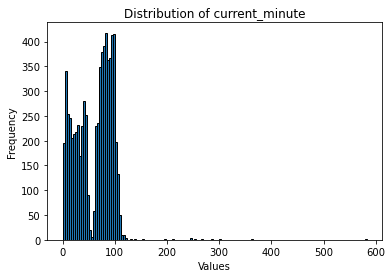

In [13]:
plot_histogram('current_minute',150)

In [14]:
data['home_red_cards'].value_counts()

0    6922
1      63
2       1
Name: home_red_cards, dtype: int64

Since we're focusing on home advantage, we can explore the home and away scores further

**Task:** Given the current minute, what is the average home score?

best_params leverage the `groupby` method in DataFrames to group the data based on 'current_minute'. Subsequently, we compute the average home score.

In [15]:
average_home_score = data.groupby('current_minute')['home_score'].mean()
average_away_score = data.groupby('current_minute')['away_score'].mean()

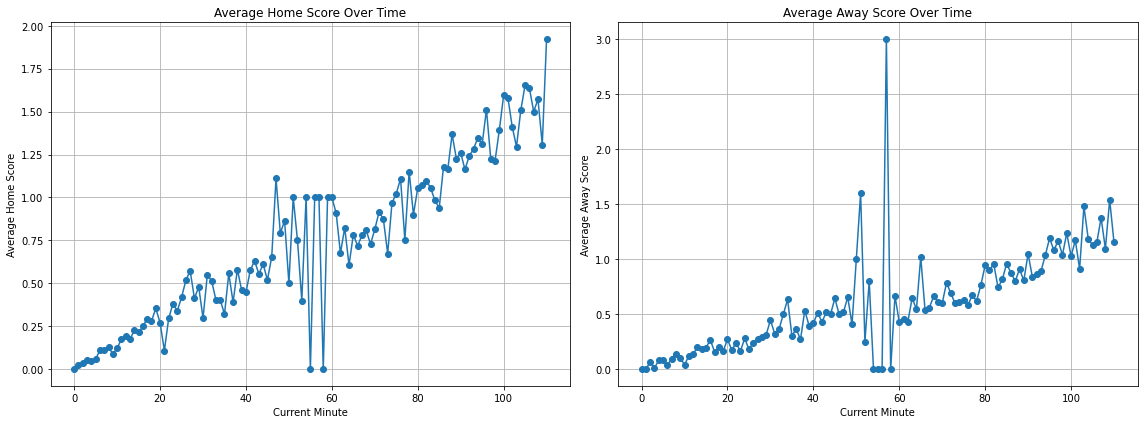

In [16]:
# Extract the 'current_minute' values and the corresponding averages for home score
minutes_home = average_home_score[average_home_score.index <= 110].index
average_scores_home = average_home_score[average_home_score.index <= 110].values

# Extract the 'current_minute' values and the corresponding averages for away score
minutes_away = average_away_score[average_away_score.index <= 110].index
average_scores_away = average_away_score[average_away_score.index <= 110].values

# Create subplots with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot for Average Home Score
axs[0].plot(minutes_home, average_scores_home, marker='o', linestyle='-')
axs[0].set_xlabel('Current Minute')
axs[0].set_ylabel('Average Home Score')
axs[0].set_title('Average Home Score Over Time')
axs[0].grid()

# Plot for Average Away Score
axs[1].plot(minutes_away, average_scores_away, marker='o', linestyle='-')
axs[1].set_xlabel('Current Minute')
axs[1].set_ylabel('Average Away Score')
axs[1].set_title('Average Away Score Over Time')
axs[1].grid()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

## 6. Model Training and Hyperparameter Tuning

Given our identified task of (insert task here), we selected K-Nearest Neighbors, Logistic Regression, and Random Forest models to address this.

Here we extract the target values for each instance which will be assigned to the `target` column. These are computed based on the values of the `home_score` and `away_score` columns where:

1. If `home_score` > `away_score`, `target` = "Home Advantage"
2. Else if `home_score` < `away_score`, `target` = "Away Advantage"
3. Else `target` = "Balanced" (indicating that the scores are equal)

In [17]:
data['target'] = np.where(data['home_score'] > data['away_score'], "Home Advantage", np.where(data['home_score'] < data['away_score'], "Away Advantage", "Balanced"))

In [18]:
print(data['target'])

0       Away Advantage
1       Home Advantage
2             Balanced
3             Balanced
4       Home Advantage
             ...      
6995          Balanced
6996    Home Advantage
6997    Home Advantage
6998    Home Advantage
6999          Balanced
Name: target, Length: 6986, dtype: object


To maintain consistency among outputs of various operations, a random seed or state is identified.

In [19]:
random_state = 42
np.random.seed(random_state)

We defined a function to compute accuracy as this will be used often.

In [20]:
def compute_accuracy(predictions, actual):
    return round(((predictions == actual).sum() / actual.size) * 100, 4)

### K-Nearest Neighbors

K-Nearest Neighbors (KNN) is a simple and effective algorithm for classification. KNN predicts the label of a new data point by locating the K-nearest neighbors to a given data point and utilizing their labels. KNN is an excellent choice for this assignment since it can manage non-linear correlations between predictor and outcome variables. Furthermore, KNN is a basic algorithm that is straightforward to build and comprehend. To achieve the best results, it is critical to select an acceptable value of K and distance measure (LaViale, 2023).

#### K-Nearest Neighbors Model Training

In [21]:
# import knn
from sklearn.neighbors import KNeighborsClassifier

# Import data
data_modified_knn = data[data['target'] != 'Balanced']
data_modified_knn = data_modified_knn.drop(["home_score", "away_score"], axis=1)

X_knn = data_modified_knn.iloc[:, :-1].values
y_knn = data_modified_knn.iloc[:, -1].values

print(f"Shape of X: {X_knn.shape}")
print(f"Shape of y: {y_knn.shape}")

Shape of X: (3927, 17)
Shape of y: (3927,)


In [22]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_knn = scaler.fit_transform(X_knn)

We need to standardize the data as there are features on different scales, which may affect the output. We observed that there was a slight increase in accuracy when we standardized the data compared to the unstandardized data.

In [23]:
# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_knn, y_knn, test_size=0.3, random_state=42)

After standardization, we can initialize the KNN model and train it on the training data.

In [24]:
#initialize knn
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Then, we make predictions of the training data

In [25]:
# make predictions
predictions_train = knn_classifier.predict(X_train)

In [26]:
# Accuracy of predictions on training data
acc_train_knn = compute_accuracy(predictions_train, y_train)
print("Accuracy of prediction on training data: ", acc_train_knn)

Accuracy of prediction on training data:  84.7889


In [27]:
# make predictions on test and 
predictions_test = knn_classifier.predict(X_test)

# Accuracy of predictions on test data
acc_test_knn = compute_accuracy(predictions_test, y_test)
print("Accuracy of prediction on test data: ",acc_test_knn)

Accuracy of prediction on test data:  68.4478


We have a fairly decent accuracy for our predictions on the training data.

#### K-Nearest Neighbors Hyperparameter Tuning

Now, we will tune the hyperparameter to possibly improve the accuracy. 

In [28]:
# Cross Validation Score
from sklearn.model_selection import cross_val_score

k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

scores = np.zeros((len(k_choices), 5))

In [29]:
# Creating models
for i in range(len(k_choices)):
    print("k is : " + str(k_choices[i]))

    model = KNeighborsClassifier(n_neighbors=k_choices[i])

    scores[i] = cross_val_score(model, X_knn, y_knn, cv=5)

k is : 1
k is : 3
k is : 5
k is : 8
k is : 10
k is : 12
k is : 15
k is : 20
k is : 50
k is : 100


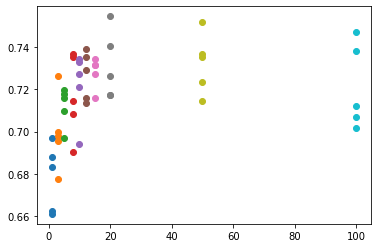

In [30]:
# Visualize the results
def plot_scatter(scores):
    for i in range(len(scores)):
        x=[k_choices[i]] * 5
        plt.scatter(x, scores[i])
        
plot_scatter(scores)

Text(0, 0.5, 'Cross-validation accuracy')

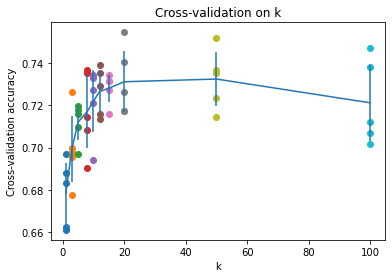

In [31]:
# Get the mean and std and plot
avg_scores = np.mean(scores, axis=1)
stddev_scores = np.std(scores, axis=1)

plot_scatter(scores)

plt.errorbar(k_choices, avg_scores, yerr=stddev_scores)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')

Now get the best hyperparameter

In [32]:
best_k = 20

In [33]:
model = KNeighborsClassifier(n_neighbors = best_k)
model.fit(X_train, y_train)
y_predicted = model.predict(X_train)


tuned_acc_train_knn = compute_accuracy(y_predicted, y_train)
num_correct= np.sum(y_train == y_predicted)
num_train = y_train.size

print("Got %d / %d correct => accuracy: %f" % (num_correct, num_train, tuned_acc_train_knn))

Got 2101 / 2748 correct => accuracy: 76.455600


In [34]:
from sklearn.model_selection import GridSearchCV

#List Hyperparameters that we want to tune.

#Convert to dictionary
hyperparameters = {'n_neighbors': np.arange(1, 200, 1)}

#Create new KNN object
knn = KNeighborsClassifier()

#Use GridSearch
clf = GridSearchCV(estimator=knn, param_grid=hyperparameters, cv=10, scoring='accuracy',error_score=0)

#Fit the model
best_model = clf.fit(X_train, y_train)

#Print The value of best Hyperparameters
best_k = best_model.best_estimator_.get_params()['n_neighbors']

print('Best n_neighbors:', best_k)

Best n_neighbors: 36


In [35]:
hyperparameters_knn_best = best_model.best_params_
hyperparameters_knn_best

{'n_neighbors': 36}

In [36]:
knn = KNeighborsClassifier(n_neighbors = best_k)

knn.fit(X_train, y_train)
y_predicted = knn.predict(X_test)


tuned_acc_test_knn = compute_accuracy(y_predicted, y_test)
num_correct= np.sum(y_test == y_predicted)
num_test = y_test.size

print("Got %d / %d correct => accuracy: %f" % (num_correct, num_test, tuned_acc_test_knn))

Got 855 / 1179 correct => accuracy: 72.519100


The accuracy of the prediction made on the testing set only increased slightly after tuning the hyperparameter using either cross validation or grid search.

### Logistic Regression

In [37]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

Let's import the RandomizedSearchCV, Logistic Regression, and some methods we will use for the metrics of our results. With this, we will be able to fit, predict, get the accuracy of the dataset and its labels.

#### Logistic Regression Model Training

In [38]:
model_data = data[data['target'] != 'Balanced']
X = model_data.drop(['home_score','away_score','target'], axis=1)
y = model_data['target']

In [39]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_validation, y_train, y_validation = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

In [40]:
model = LogisticRegression(multi_class='multinomial')

In [41]:
model.fit(X_train, y_train)
pred = model.predict(X_train)
acc_train_lr = accuracy_score(y_train, pred) * 100
print("Logistic Regression Training Set Accuracy: ", acc_train_lr)


Logistic Regression Training Set Accuracy:  77.66454352441615


C:\Users\Windows 10\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
pred = model.predict(X_test)
acc_test_lr = accuracy_score(y_test, pred) * 100
print("Logistic Regression Testing Set Accuracy: ", acc_test_lr)

Logistic Regression Testing Set Accuracy:  78.2442748091603


In [43]:
model.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [44]:
# Define hyperparameter grid for grid search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'class_weight': [None, 'balanced'],
    'fit_intercept': [True, False],
    'solver': ['lbfgs', 'newton-cg', 'sag'],
    'max_iter': [1000, 2000, 3000, 4000, 5000, 10000]
}


In [45]:
# write code here
rsr = RandomizedSearchCV(estimator = model, param_distributions=param_grid, cv = 5, random_state = 42, n_iter = 50)
rsr.fit(X_train, y_train)

C:\Users\Windows 10\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Windows 10\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Windows 10\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Windows 10\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Windows 10\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Windows 10\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: Con

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(multi_class='multinomial'),
                   n_iter=50,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'class_weight': [None, 'balanced'],
                                        'fit_intercept': [True, False],
                                        'max_iter': [1000, 2000, 3000, 4000,
                                                     5000, 10000],
                                        'solver': ['lbfgs', 'newton-cg',
                                                   'sag']},
                   random_state=42)

This cell above performs the RandomizedSearchCV to hypertune the Logistic Regression classifier. Now, let's output the best parameters from the Randomized search hypertuning.

In [46]:
# Get the best parameters and the best model
best_params = rsr.best_params_
best_model = rsr.best_estimator_

In [47]:
best_params

{'solver': 'newton-cg',
 'max_iter': 4000,
 'fit_intercept': True,
 'class_weight': None,
 'C': 0.1}

Let us predict and check the score of the predictions against the validation set using our best model.

In [48]:
y_val_pred = best_model.predict(X_validation)

We can check the accuracy  and check the score of the predictions against the validation set using our best model.

In [49]:
val_accuracy = accuracy_score(y_validation, y_val_pred)
val_report = classification_report(y_validation, y_val_pred)

In [50]:
# Calculate accuracy
val_accuracy = accuracy_score(y_validation, y_val_pred)

# Generate the classification report as a dictionary
val_report_dict = classification_report(y_validation, y_val_pred, output_dict=True)

# Convert the classification report dictionary to a DataFrame
val_report_df = pd.DataFrame(val_report_dict).transpose()

# Print the results
print("Validation Set Results:")
print(f"Best Hyperparameters: {best_params}")
print(f"Validation Accuracy: {val_accuracy}")
val_report_df

Validation Set Results:
Best Hyperparameters: {'solver': 'newton-cg', 'max_iter': 4000, 'fit_intercept': True, 'class_weight': None, 'C': 0.1}
Validation Accuracy: 0.7824427480916031


,precision,recall,f1-score,support
Away Advantage,0.784672,0.657492,0.715474,327.000000
Home Advantage,0.781250,0.871460,0.823893,459.000000
accuracy,0.782443,0.782443,0.782443,0.782443
macro avg,0.782961,0.764476,0.769684,786.000000
weighted avg,0.782673,0.782443,0.778787,786.000000


**Insights:**
  - The model performs best for the "Balanced" class, indicating good precision, recall, and F1-Score.
  - The model struggles with precision for the "Away Advantage" class, indicating a higher rate of false positives.
  - A balanced F1-Score suggests that the model maintains a reasonable trade-off between precision and recall across classes.
  - The weighted average F1-Score (0.5867) reflects an overall decent performance, considering the class distribution.

**Recommendations:**
  - Further investigate and potentially address the false positives in predicting "Away Advantage."

#### Try our trained model on the test data

Let's first get the prediction results on the train data.

In [51]:
y_train_pred = best_model.predict(X_train)
tuned_acc_train_lr = accuracy_score(y_train, y_train_pred) * 100
print("Logistic Regression Training Set Accuracy: ", acc_train_lr)

Logistic Regression Training Set Accuracy:  77.66454352441615


Now, let's get the prediction results on the test data to see if our model can handle unseen instances.

In [52]:
y_test_pred = best_model.predict(X_test)

In [53]:
# Calculate accuracy
tuned_acc_test_lr = accuracy_score(y_test, y_test_pred) * 100

# Generate the classification report as a dictionary
test_report_dict = classification_report(y_test, y_test_pred, output_dict=True)

# Convert the classification report dictionary to a DataFrame
test_report_df = pd.DataFrame(test_report_dict).transpose()

# Print the results
print("\nTest Set Results:")
print(f"Test Accuracy: {tuned_acc_test_lr}")
test_report_df


Test Set Results:
Test Accuracy: 78.49872773536896


,precision,recall,f1-score,support
Away Advantage,0.816901,0.664756,0.733017,349.000000
Home Advantage,0.766932,0.881007,0.820021,437.000000
accuracy,0.784987,0.784987,0.784987,0.784987
macro avg,0.791917,0.772882,0.776519,786.000000
weighted avg,0.789120,0.784987,0.781390,786.000000


**Insights:**
  - The model performs well in distinguishing between "Home Advantage" and "Away Advantage" classes, with high precision and recall values for both.
  - A balanced F1-Score suggests that the model maintains a reasonable trade-off between precision and recall across classes.
  - The weighted average F1-Score (0.7814) reflects an overall strong performance, considering the class distribution in the test set.

### Random Forest

For the third model, random forest was chosen for its benefits including being less prone to overfitting, and being able to extract the importances of each feature used in training *(What is Random Forest?, n.d.)*. Given that random forest extends decision trees' predictive power by taking the average of multiple trees, it better captures the general trend of the provided training data. Additionally, by knowing which features have higher importance in influencing the model's predictions, feature selection could happen where less important features can be removed, resulting in a less complex model.

#### Random Forest Training

To begin training, irrelevant rows and columns the feature matrix and target vector are split into train and test sets.

In [54]:
rf_data = data.drop(["home_score", "away_score"], axis=1)
rf_data = rf_data[rf_data['target'] != 'Balanced']

In [55]:
X = rf_data.iloc[:, :-1].values
y = rf_data.iloc[:, -1].values

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (3927, 17)
Shape of y: (3927,)


In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state, stratify=y)

A `RandomForestClassifer` object is created and trained with default hyperparameters (as documented [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)). The following are the hyperparameters (and initial values) we will be working with and tuning later on.

- n_estimators = 100
- criterion = "gini"
- min_samples_leaf = 2
- max_features = "sqrt"
- max_samples = None

These hyperparameters were selected given that they were described to have most influence on performance and extraction of feature importance *(Probst et al., 2019)*.

In [57]:
rfc = RandomForestClassifier(random_state=random_state, n_jobs=-1)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

Predictions can now be made on both the training set and test set.

In [58]:
predictions_train = rfc.predict(X_train)
acc_train_rf = compute_accuracy(predictions_train, y_train)
print("Random forest classifier train accuracy:", acc_train_rf, "%")

Random forest classifier train accuracy: 98.3022 %


In [59]:
predictions_test = rfc.predict(X_test)
acc_test_rf = compute_accuracy(predictions_test, y_test)
print("Random forest classifier test accuracy:", acc_test_rf, "%")

Random forest classifier test accuracy: 76.2729 %


The above accuracies show that the model performs very well on the training set but performs poorly on the test set. This shows that the model has **high variance** and is **overfitting**.

#### Random Forest Hyperparameter Tuning

We define the search space for hyperparameter tuning:

In [60]:
hyperparameters_rf = {
    'n_estimators': [100, 120, 140, 300],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', None],
    'max_samples': uniform(0.1, 0.9)
}

To tune the hyperparameters of the Random Forest model, the `RandomizedSearchCV` class will be used. We set the the number of combinations to try (n_iter) to `50` and the number of cross valdiation folds to `7`.

In [61]:
rsr = RandomizedSearchCV(estimator=rfc, param_distributions=hyperparameters_rf, n_iter=50, cv=7, random_state=42)

The models are then trained on the training data to produce the best hyperparameters.

In [62]:
rsr.fit(X_train, y_train)

RandomizedSearchCV(cv=7,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=50,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_features': ['sqrt', None],
                                        'max_samples': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002860FDADB80>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002860FE17B20>,
                                        'n_estimators': [100, 120, 140, 300]},
                   random_state=42)

In [63]:
hyperparameters_rf_best = rsr.best_params_
hyperparameters_rf_best

{'criterion': 'log_loss',
 'max_features': 'sqrt',
 'max_samples': 0.725306439735734,
 'min_samples_leaf': 2,
 'n_estimators': 120}

Based on these hyperparameters, we can access the best estimator using these identified hyperparameters as well as its feature importances.

In [64]:
best_estimator_rf = rsr.best_estimator_

feature_importance = best_estimator_rf.feature_importances_
df_rfc_importance = pd.DataFrame(data=feature_importance, index=rf_data.drop(["target"], axis=1).columns, columns=["importance"])
df_rfc_importance.sort_values(by="importance", ascending=False)

,importance
home_on_target,0.185931
away_on_target,0.177006
current_minute,0.078129
home_attacks,0.066965
away_attacks,0.066869
away_dangerous_attacks,0.064793
home_dangerous_attacks,0.064610
away_possession,0.049333
home_possession,0.046679
home_off_target,0.040480


This shows that the 3 most important features are `home_on_target`, `current_minute`, and `away_on_target` while the 3 least important features are `home_yellow_cards`, `away_red_cards`, `home_red_cards`.

Here are the relevant results and metrics from each iteration of random combinations.

In [65]:
rsr_results = pd.DataFrame(rsr.cv_results_).sort_values(by=["rank_test_score"])
rsr_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_max_samples,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
29,0.274148,0.018005,0.043139,0.007077,log_loss,sqrt,0.725306,2,120,"{'criterion': 'log_loss', 'max_features': 'sqr...",0.769596,0.788599,0.757720,0.786223,0.783848,0.800000,0.759524,0.777930,0.014743,1
32,0.214143,0.001457,0.031863,0.000648,gini,sqrt,0.916146,1,100,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.767221,0.779097,0.752969,0.769596,0.795724,0.792857,0.771429,0.775556,0.013892,2
38,0.202443,0.004130,0.032146,0.000834,entropy,sqrt,0.547524,1,100,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.767221,0.790974,0.767221,0.779097,0.786223,0.783333,0.754762,0.775547,0.011928,3
45,0.217129,0.000982,0.032718,0.000454,entropy,sqrt,0.834789,1,100,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.774347,0.769596,0.752969,0.774347,0.795724,0.790476,0.764286,0.774535,0.013616,4
13,0.255857,0.010934,0.032287,0.001279,entropy,None,0.266369,2,120,"{'criterion': 'entropy', 'max_features': None,...",0.771971,0.788599,0.755344,0.764846,0.781473,0.780952,0.766667,0.772836,0.010674,5
49,0.697860,0.009994,0.078570,0.001174,gini,None,0.448062,2,300,"{'criterion': 'gini', 'max_features': None, 'm...",0.764846,0.779097,0.743468,0.776722,0.798100,0.778571,0.764286,0.772156,0.015683,6
44,0.320571,0.005828,0.032145,0.000836,entropy,None,0.523271,2,120,"{'criterion': 'entropy', 'max_features': None,...",0.764846,0.795724,0.733967,0.771971,0.790974,0.773810,0.771429,0.771817,0.018609,7
43,0.271086,0.006697,0.045427,0.005148,log_loss,sqrt,0.432689,1,140,"{'criterion': 'log_loss', 'max_features': 'sqr...",0.755344,0.783848,0.764846,0.760095,0.788599,0.780952,0.766667,0.771479,0.011910,8
11,0.513142,0.007937,0.066150,0.005383,gini,None,0.13095,1,300,"{'criterion': 'gini', 'max_features': None, 'm...",0.767221,0.774347,0.755344,0.767221,0.795724,0.780952,0.759524,0.771476,0.012679,9
20,0.222088,0.004936,0.032141,0.000834,log_loss,sqrt,0.794143,5,120,"{'criterion': 'log_loss', 'max_features': 'sqr...",0.750594,0.776722,0.760095,0.767221,0.788599,0.792857,0.761905,0.771142,0.014404,10


The updated predictions are as follows:

In [66]:
tuned_predictions_train = best_estimator_rf.predict(X_train)
tuned_acc_train_rf = compute_accuracy(tuned_predictions_train, y_train)
print("Random forest classifier train accuracy:", tuned_acc_train_rf, "%")

Random forest classifier train accuracy: 95.2801 %


In [67]:
tuned_predictions_test = best_estimator_rf.predict(X_test)
tuned_acc_test_rf = compute_accuracy(tuned_predictions_test, y_test)
print("Random forest classifier test accuracy:", tuned_acc_test_rf, "%")

Random forest classifier test accuracy: 76.1711 %


Compared to the model's initial performance on default hyperparameter values, the accuracy of the model trained with the "best" hyperparameters performed worse.

## 7. Model Selection

Here, we exhibit each model's initial configurations and best sets of hyperparameters after tuning. The following are the search spaces defined to find hyperparameters that improve accuracy:

The `RandomizedSearchCV` hyperparameter tuning method was used. The initial hyperparameters were updated to the best ones found as follows:

In [68]:
def printInitialBestParams(modelName, originalModel, tunedModel, hyperparameterSearchSpace):
    print(f"Initial and Best hyperparameters for {modelName}:")
    params_df = pd.DataFrame({
        'Parameter': list(hyperparameterSearchSpace.keys()),
        'Initial': [originalModel.get_params()[key] for key in hyperparameterSearchSpace.keys()],
        'Best': [tunedModel.get_params()[key] for key in hyperparameterSearchSpace.keys()],
    })
    return params_df

In [69]:
# Replace params with knn stuff
printInitialBestParams("K-Nearest Neighbors", knn, knn, hyperparameters_knn_best)

Initial and Best hyperparameters for K-Nearest Neighbors:


,Parameter,Initial,Best
0,n_neighbors,36,36


In [70]:
# Replace params with Logistic regression stuff
printInitialBestParams("Logistic Regression", model, model, param_grid)

Initial and Best hyperparameters for Logistic Regression:


,Parameter,Initial,Best
0,C,1.0,1.0
1,class_weight,None,None
2,fit_intercept,True,True
3,solver,lbfgs,lbfgs
4,max_iter,100,100


In [71]:
printInitialBestParams("Random Forest", rfc, best_estimator_rf, hyperparameters_rf)

Initial and Best hyperparameters for Random Forest:


,Parameter,Initial,Best
0,n_estimators,100,120
1,criterion,gini,log_loss
2,min_samples_leaf,1,2
3,max_features,sqrt,sqrt
4,max_samples,None,0.725306


Using the best hyperparameters identified, the following are the accuracies that were computed for each model.

In [72]:
# Replace with ur own models stuff

accuracies = [
   ['K-Nearest Neighbors', [acc_train_knn, acc_test_knn], [tuned_acc_train_knn, tuned_acc_test_knn]],
    ['Logistic Regression', [round(acc_train_lr, 4), round(acc_test_lr, 4)], [round(tuned_acc_train_lr, 4), round(tuned_acc_test_lr, 4)]],
    ['Random Forest', [acc_train_rf, acc_test_rf], [tuned_acc_train_rf, tuned_acc_test_rf]]
]

pd.DataFrame(accuracies, columns=["Model","Initial (Train, Test)", "Best (Train, Test)"])

,Model,"Initial (Train, Test)","Best (Train, Test)"
0,K-Nearest Neighbors,"[84.7889, 68.4478]","[76.4556, 72.5191]"
1,Logistic Regression,"[77.6645, 78.2443]","[77.2399, 78.4987]"
2,Random Forest,"[98.3022, 76.2729]","[95.2801, 76.1711]"


Based on these accuracies, we conclude that the Logistic Regression model is the best suited for the identified task.

## 8. Insights and Conclusions

For KNN, after fine-tuning the hyperparameters, the K-Nearest Neighbor (KNN) model exhibited a marginal improvement in accuracy. Despite this modification, it is not recommended to use this model on the current dataset. The observed performance may be due to the complexity and abundance of characteristics in the dataset. To improve the efficiency and speed of the KNN method, the dimensionality of the data must be reduced. Dimensionality can make distances between data points less distinct, increasing model complexity and decreasing efficacy.

For Random Forest, despite being designed to mitigate overfitting, both the default hyperparameter configuration and the model fine-tuned with the best-found hyperparameters still demonstrate overfitting tendencies, as shown by relatively lower prediction accuracy on the test set compared to the training set. To address this, an examination of feature importances revealed that certain features may not significantly contribute to the model's performance. Consequently, a potential enhancement involves considering the removal of features with limited influence. Moreover, the process of hyperparameter tuning involved extensive trial and error within the search space, yielding only marginal improvements. To refine this approach, further exploration of hyperparameter combinations, such as the inclusion of parameters like max depth, could be undertaken to achieve more substantial enhancements in model accuracy.

In summary, the logistic regression model, outperforms the other two models, achieving an accuracy of 78.50% on the test set. The model demonstrates a well-balanced precision and recall across classes, with particularly robust discrimination between instances of "Home Advantage" and "Away Advantage." This enhanced performance can be attributed to the exclusion of snapshots categorized as "Balanced," where home and away scores are equal.

## 9. References

LaViale, T. (2023, March 16). Deep Dive on KNN: Understanding and Implementing the K-Nearest Neighbors Algorithm. Arize. https://arize.com/blog-course/knn-algorithm-k-nearest-neighbor/

Probst, P., Wright, M. N., & Boulesteix, A. (2019). Hyperparameters and tuning strategies for Random Forest. WIREs Data Mining and Knowledge Discovery, 9(3). https://doi.org/10.1002/widm.1301 

The World’s Most Watched Sports. (2017, July 17). Sport For Business. https://sportforbusiness.com/the-worlds-most-watched-sports/

The Most Popular Sports In The World. (n.d.). WorldAtlas. https://www.worldatlas.com/articles/what-are-the-most-popular-sports-in-the-world.html

What is Random Forest?. IBM. (n.d.). https://www.ibm.com/topics/random-forest 

Zheng, S. (2015). Home Advantage in Soccer. The Pit Journal. https://pitjournal.unc.edu/2023/01/12/home-advantage-in-soccer/